In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
#image data generator is the package to lable the images & it will automatically lable all the images

In [39]:
img=image.load_img(r'C:\Ds & AI ( my work)\AVSCODE\CNN - Happy or Sad\training\Happy\pic-4.jpg')

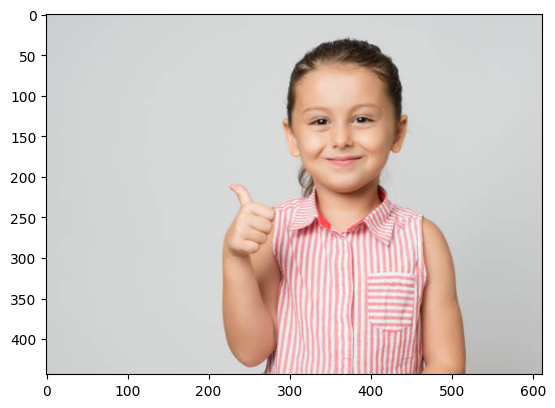

In [40]:
plt.imshow(img)

In [41]:
i1= cv2.imread(r'C:\Ds & AI ( my work)\AVSCODE\CNN - Happy or Sad\training\Happy\pic-4.jpg')
i1

array([[[206, 205, 201],
        [206, 205, 201],
        [206, 205, 201],
        ...,
        [213, 212, 208],
        [213, 212, 208],
        [213, 212, 208]],

       [[206, 205, 201],
        [206, 205, 201],
        [206, 205, 201],
        ...,
        [213, 212, 208],
        [213, 212, 208],
        [213, 212, 208]],

       [[206, 205, 201],
        [206, 205, 201],
        [206, 205, 201],
        ...,
        [213, 212, 208],
        [213, 212, 208],
        [213, 212, 208]],

       ...,

       [[206, 207, 205],
        [206, 207, 205],
        [206, 207, 205],
        ...,
        [184, 186, 186],
        [184, 186, 186],
        [184, 186, 186]],

       [[206, 207, 205],
        [206, 207, 205],
        [206, 207, 205],
        ...,
        [184, 186, 186],
        [184, 186, 186],
        [184, 186, 186]],

       [[206, 207, 205],
        [206, 207, 205],
        [206, 207, 205],
        ...,
        [184, 186, 186],
        [184, 186, 186],
        [184, 186, 186]]

In [42]:
i1.shape   # shape of the image- heigjt, weight,rgb

(444, 612, 3)

In [43]:
train=ImageDataGenerator(rescale=1/200)
validation=ImageDataGenerator(rescale=1/200)     # resize the image using 200,200 pixel)

In [44]:
train_dataset=train.flow_from_directory(r'C:\Ds & AI ( my work)\AVSCODE\CNN - Happy or Sad\training',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory(r'C:\Ds & AI ( my work)\AVSCODE\CNN - Happy or Sad\validation',
                                                  target_size=(200,200),
                                                  batch_size=3,
                                                  class_mode='binary')

Found 6 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [45]:
train_dataset.class_indices

{'Happy': 0, 'Sad': 1}

In [46]:
train_dataset.classes

array([0, 0, 1, 1, 1, 1], dtype=int32)

In [47]:
# now we are applying maxpooling
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 198, 198, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 99, 99, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 97, 97, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    17,334,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,358,881 (66.22 MB)

 Trainable params: 17,358,881 (66.22 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [49]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [50]:
model_fit = model.fit(train_dataset,epochs = 15)
                     

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - accuracy: 0.3333 - loss: 20.9841
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - accuracy: 0.6667 - loss: 1.3714
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.6667 - loss: 0.6166
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.6667 - loss: 0.7535
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.6667 - loss: 0.9686
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.5000 - loss: 0.5466
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.8333 - loss: 0.4197
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 1.0000 - loss: 0.1773
Epoch 9/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 1.0000 - loss: 0.2175
Epoch 10/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 1.0000 - loss: 0.0600
Epoch 11/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 1.0000 - loss: 0.0236
Epoch 12/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 1.0000 - l

In [51]:
dir_path = r'C:\Ds & AI ( my work)\AVSCODE\CNN - Happy or Sad\testing'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

pic-3.webp
pic-4.jpg
pic-5.jpg
pic-6.jpg
pic-7.jpeg
pic-8.jpeg
pic-9.jpeg


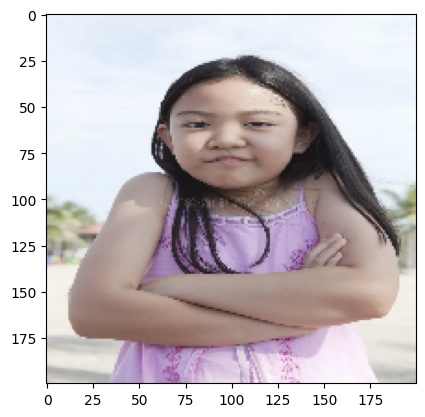

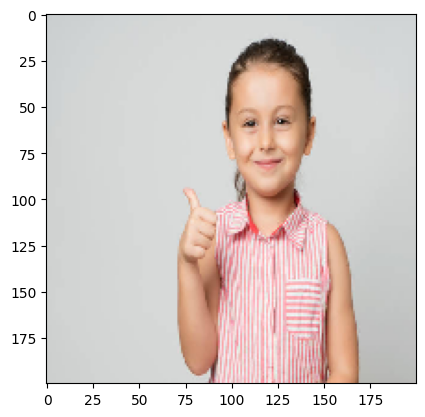

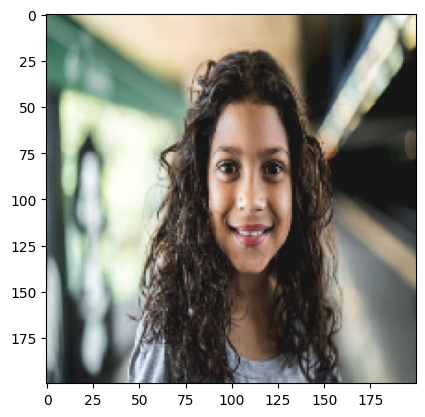

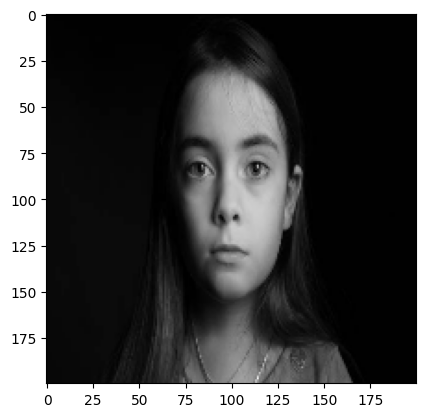

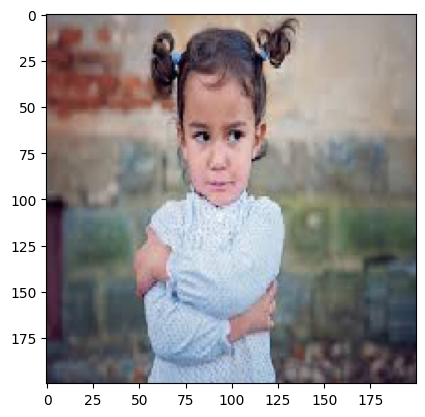

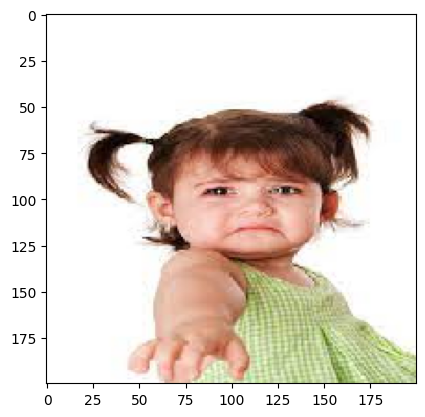

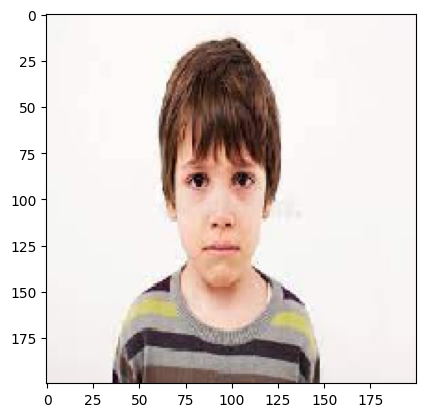

In [52]:
dir_path = r'C:\Ds & AI ( my work)\AVSCODE\CNN - Happy or Sad\testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

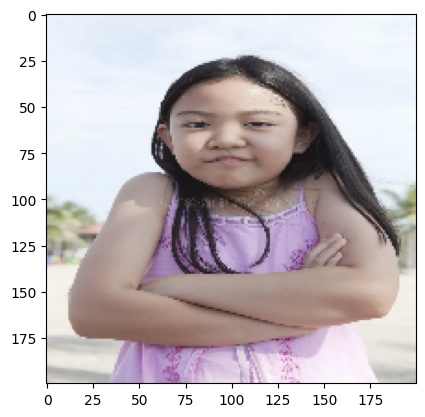

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
i am not happy


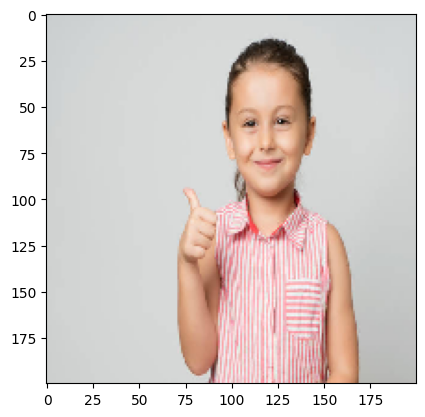

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
 i am happy


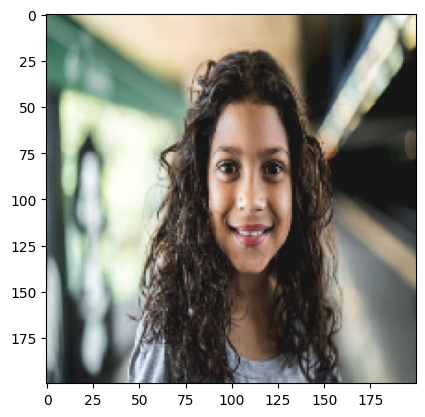

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
 i am happy


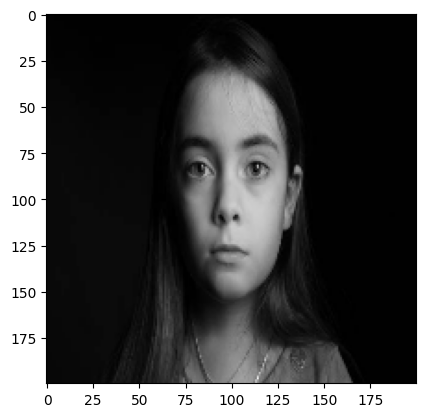

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
i am not happy


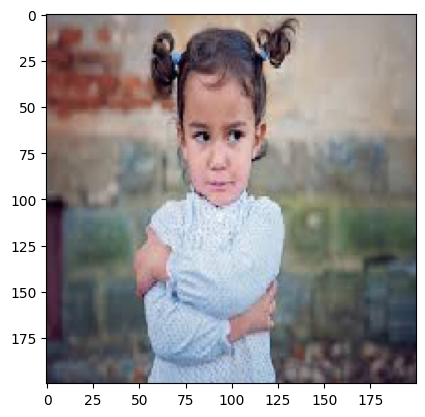

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
i am not happy


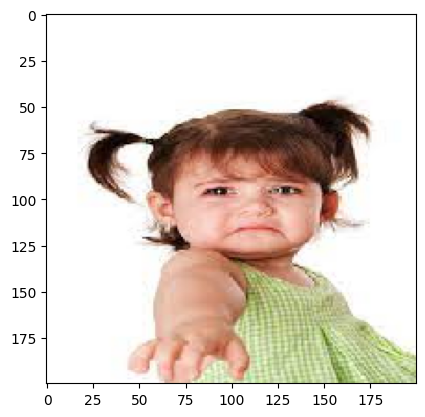

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
i am not happy


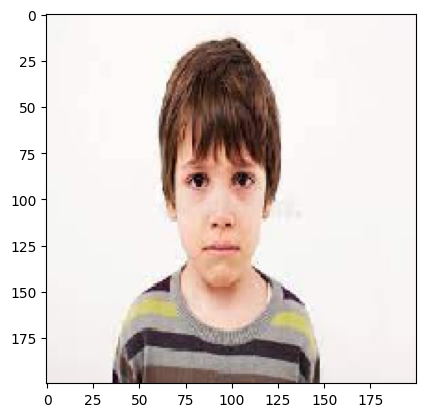

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
i am not happy


In [54]:
dir_path = r'C:\Ds & AI ( my work)\AVSCODE\CNN - Happy or Sad\testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
        
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' i am happy')
    else:
        print('i am not happy')